The company providing cleaning services for the hospitals has found out that the demand
for its services is quite seasonal. The number of hours of service needed in each month is given in the table
below:

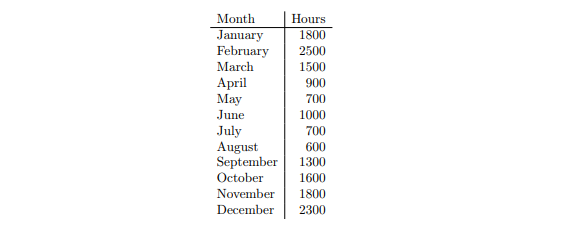

Each person is hired at the beginning of a month for a 3- or 6-month contract. Each person needs to pass the
training in the first month, which decreases the number of hours for which he/she is available to 80. In any
other month he/she can work for 196 hours. The monthly payment of any worker is $1700. Write an integer
program allowing you to find the optimal plan of hireing people for 3- and 6-month contracts. Your goal should
be the minimization of cost subject to covering all the demand.

$ X_{i,j}$ - worker on 3 month contract working in month i, during his j-th month of contract $\\$
$ Y_{i,j}$ - worker on 6 month contract working in month i, during his j-th month of contract 

$\text{Minimize} \quad Z = 1700 \cdot \sum\limits_{i=1}^{12} \left(\sum\limits_{j=1}^{3} X_{i,j} + \sum\limits_{j=1}^{6} Y_{i,j}\right)$


$\text{subject to: } \ 80 \cdot X_{1,1} + 196 \cdot (X_{1,2}+X_{1,3}) + 80 \cdot Y_{1,1} +196 \cdot (Y_{1,2}+Y_{1,3}+Y_{1,4}+Y_{1,5}+Y_{1,6}) \geq 1800 \\$
$\quad \quad \quad \quad 80 \cdot X_{2,1} + 196 \cdot (X_{2,2}+X_{2,3}) + 80 \cdot Y_{2,1} +196 \cdot (Y_{2,2}+Y_{2,3}+Y_{2,4}+Y_{2,5}+Y_{2,6}) \geq 2500 \\ $<br>
&vellip;<br> 


$\quad \quad \quad \quad 80 \cdot X_{12,1} + 196 \cdot (X_{12,2}+X_{12,3}) + 80 \cdot Y_{12,1} +196 \cdot (Y_{12,2}+Y_{12,3}+Y_{12,4}+Y_{12,5}+Y_{12,6}) \geq 2300$ 

### Demand constraints ^

### So we can write it in one eq:

$ \ 80 \cdot X_{i,j} + 196 \cdot (\sum\limits_{j=2}^{3} X_{i,j}) + 80 \cdot Y_{1,1} +196 \cdot (\sum\limits_{j=2}^{6} Y_{i,j} ) \geq \text{Hours demand in ith month} $ 

and for $i>1$ and $j>1$ we have: $ X_{i,j} = X_{i-1,j-1} $ and $Y_{i-1,j-1}$

$ X_{i,j} \geq 0 $ and $Y_{i,j} \geq 0, \text{for } i \in \{1,2,...,12\} \text{ and } j \in \{1,2,...,6\}$

### Here is how every "row" looks like in terms of variables

$$
1. x_{11} + x_{12} + x_{13} + y_{11} + y_{12} + y_{13} + y_{14} + y_{15} + y_{16}  \\
2. x_{21} + x_{11} + x_{12} + y_{21} + y_{11} + y_{12} + y_{13} + y_{14} + y_{15}  \\
3. x_{31} + x_{21} + x_{11} + y_{31} + y_{21} + y_{11} + y_{12} + y_{13} + y_{14}  \\
4. x_{41} + x_{31} + x_{21} + y_{41} + y_{31} + y_{21} + y_{11} + y_{12} + y_{13}  \\
5. x_{51} + x_{41} + x_{31} + y_{51} + y_{41} + y_{31} + y_{21} + y_{11} + y_{12}  \\
6. x_{61} + x_{51} + x_{41} + y_{61} + y_{51} + y_{41} + y_{31} + y_{21} + y_{11}  \\
7. x_{71} + x_{61} + x_{51} + y_{71} + y_{61} + y_{51} + y_{41} + y_{31} + y_{21}  \\
8. x_{81} + x_{71} + x_{61} + y_{81} + y_{71} + y_{61} + y_{51} + y_{41} + y_{31}  \\
9. x_{91} + x_{81} + x_{71} + y_{91} + y_{81} + y_{71} + y_{61} + y_{51} + y_{41}  \\
10. x_{101} + x_{91} + x_{81} + y_{101} + y_{91} + y_{81} + y_{71} + y_{61} + y_{51}\\
11. x_{111} + x_{101} + x_{91} + y_{111} + y_{101} + y_{91} + y_{81} + y_{71} + y_{61}  \\
12. x_{121} + x_{111} + x_{101} + y_{121} + y_{111} + y_{101} + y_{91} + y_{81} + y_{71} \\
$$


### By looking on the grid above, we noticed the patter of changing indexes and wrote function to replicate it

In [99]:
import pulp

In [100]:
def gen_index(starting):
    """
    based on first "pair" it generates other pairs in given row
    """
    ind = []
    ind.append(starting)
    for i in range(2):
        if ind[-1] == (1,1):
            ind.append((1,2))
        elif ind[-1][0] != 1:
            ind.append((ind[-1][0]-1,ind[-1][1]))
        else:
            ind.append((ind[-1][0],ind[-1][1]+1))
    ind.append(starting)
    for i in range(5):
        if ind[-1] == (1,1):
            ind.append((1,2))
        elif ind[-1][0] != 1:
            ind.append((ind[-1][0]-1,ind[-1][1]))
        else:
            ind.append((ind[-1][0],ind[-1][1]+1))
    return ind

In [101]:
gen_index((1,1))

[(1, 1), (1, 2), (1, 3), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6)]

In [102]:
gen_index((5,1))

[(5, 1), (4, 1), (3, 1), (5, 1), (4, 1), (3, 1), (2, 1), (1, 1), (1, 2)]

In [103]:
starting_nodes = [(i,1) for i in range(1,13)]
starting_nodes

[(1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1)]

In [104]:
work_demand2 = pulp.LpProblem('work_demand_problem', pulp.LpMinimize)

### Defining variables

In [105]:
indices_i = range(1, 13)
indices_j = range(1, 4)

x = {(i, j): pulp.LpVariable(f"x{i}{j}", lowBound=0, cat='Integer') for i in indices_i for j in indices_j}

indices_i = range(1, 13)
indices_j = range(1, 7)

y = {(i, j): pulp.LpVariable(f"y{i}{j}", lowBound=0, cat='Integer') for i in indices_i for j in indices_j}

### Defining constraints 

In [106]:
mini = 0
for k in range(12):
    row = gen_index(starting_nodes[k])
    for l in range(3):
        mini += x[row[l]]
    for ll in range(6):
        mini += y[row[3+ll]]

In [107]:
mini

3*x101 + 3*x11 + 2*x111 + 2*x12 + 1*x121 + 1*x13 + 3*x21 + 3*x31 + 3*x41 + 3*x51 + 3*x61 + 3*x71 + 3*x81 + 3*x91 + 3*y101 + 6*y11 + 2*y111 + 5*y12 + 1*y121 + 4*y13 + 3*y14 + 2*y15 + 1*y16 + 6*y21 + 6*y31 + 6*y41 + 6*y51 + 6*y61 + 6*y71 + 5*y81 + 4*y91 + 0

### adding first constraint

In [108]:
work_demand2 += 1700 * mini

In [109]:
hd = [1800,2500,1500,900,700,1000,700,600,1300,1600,1800,2300]

### Function to generate row given the starting indexes, it can also be used to get results - values of each x and y after we find solution

In [110]:
def make_row(starting,amount = False,hours = False):
    indices = gen_index(starting)
    row = 0
    if amount is False and hours is False:
        row += 80*x[indices[0]]
        for l in range(2):
            row += 196*x[indices[1+l]]
        row += 80*y[indices[3]]        
        for ll in range(5):
            row += 196*y[indices[4+ll]]  
        return row
    elif hours is True:
        row += 80*x[indices[0]].value()
        for l in range(2):
            row += 196*x[indices[1+l]].value()
        row += 80*y[indices[3]].value()        
        for ll in range(5):
            row += 196*y[indices[4+ll]].value()   
        return row
    elif amount is True:
        m3 = 0
        m6 = 0
        m3 += x[indices[0]].value()
        for l in range(2):
            m3+= x[indices[1+l]].value()
        m6 += y[indices[3]].value()        
        for ll in range(5):
            m6 += y[indices[4+ll]].value()
        return m3,m6

In [111]:
make_row((5,1))

196*x31 + 196*x41 + 80*x51 + 196*y11 + 196*y12 + 196*y21 + 196*y31 + 196*y41 + 80*y51 + 0

In [118]:
make_row((5,1),amount=True)

(1.0, 4.0)

In [119]:
make_row((5,1),hours=True)

864.0

### Adding the rest of equations

In [113]:
for lll in range(12):
    work_demand2 += make_row((lll+1,1)) >= hd[lll] 

In [114]:
print(work_demand2)

work_demand_problem:
MINIMIZE
5100*x101 + 5100*x11 + 3400*x111 + 3400*x12 + 1700*x121 + 1700*x13 + 5100*x21 + 5100*x31 + 5100*x41 + 5100*x51 + 5100*x61 + 5100*x71 + 5100*x81 + 5100*x91 + 5100*y101 + 10200*y11 + 3400*y111 + 8500*y12 + 1700*y121 + 6800*y13 + 5100*y14 + 3400*y15 + 1700*y16 + 10200*y21 + 10200*y31 + 10200*y41 + 10200*y51 + 10200*y61 + 10200*y71 + 8500*y81 + 6800*y91 + 0
SUBJECT TO
_C1: 80 x11 + 196 x12 + 196 x13 + 80 y11 + 196 y12 + 196 y13 + 196 y14
 + 196 y15 + 196 y16 >= 1800

_C2: 196 x11 + 196 x12 + 80 x21 + 196 y11 + 196 y12 + 196 y13 + 196 y14
 + 196 y15 + 80 y21 >= 2500

_C3: 196 x11 + 196 x21 + 80 x31 + 196 y11 + 196 y12 + 196 y13 + 196 y14
 + 196 y21 + 80 y31 >= 1500

_C4: 196 x21 + 196 x31 + 80 x41 + 196 y11 + 196 y12 + 196 y13 + 196 y21
 + 196 y31 + 80 y41 >= 900

_C5: 196 x31 + 196 x41 + 80 x51 + 196 y11 + 196 y12 + 196 y21 + 196 y31
 + 196 y41 + 80 y51 >= 700

_C6: 196 x41 + 196 x51 + 80 x61 + 196 y11 + 196 y21 + 196 y31 + 196 y41
 + 196 y51 + 80 y61 >= 1000


In [115]:
solution = work_demand2.solve()

## calculating total money spent

In [116]:
total_money = 0
for k in range(12):
    row = gen_index(starting_nodes[k])
    for l in range(3):
        total_money += x[row[l]].value()
    for ll in range(6):
        total_money += y[row[3+ll]].value()
print("total money spent on worker: ",1700*total_money)

total money spent on worker:  173400.0


# final results

In [117]:
o = 0
for p in starting_nodes:
    print("hours provided:", make_row(p,hours=True),"demanded:", hd[o],"workers on 3month contr.: ", make_row(p,amount=True)[0],"workers on 6month contr.: ", make_row(p,amount=True)[1])
    o += 1

hours provided: 1888.0 demanded: 1800 workers on 3month contr.:  8.0 workers on 6month contr.:  4.0
hours provided: 2512.0 demanded: 2500 workers on 3month contr.:  8.0 workers on 6month contr.:  6.0
hours provided: 1568.0 demanded: 1500 workers on 3month contr.:  2.0 workers on 6month contr.:  6.0
hours provided: 980.0 demanded: 900 workers on 3month contr.:  0.0 workers on 6month contr.:  5.0
hours provided: 864.0 demanded: 700 workers on 3month contr.:  1.0 workers on 6month contr.:  4.0
hours provided: 1060.0 demanded: 1000 workers on 3month contr.:  2.0 workers on 6month contr.:  4.0
hours provided: 784.0 demanded: 700 workers on 3month contr.:  2.0 workers on 6month contr.:  2.0
hours provided: 676.0 demanded: 600 workers on 3month contr.:  1.0 workers on 6month contr.:  6.0
hours provided: 1336.0 demanded: 1300 workers on 3month contr.:  0.0 workers on 6month contr.:  8.0
hours provided: 1648.0 demanded: 1600 workers on 3month contr.:  1.0 workers on 6month contr.:  8.0
hours pr